In [2]:
import pandas as pd
import numpy as np
from scipy import integrate
from pylab import *
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

In [23]:
K=1
pre=1
final =0.153
delay = 7.62

tau = linspace(2,3,num=100)
LS = np.zeros(len(tau))
points = pd.DataFrame({'t': [7.62,8.08,8.69,9.22,11.73,11.85,20,30,40], 'd': [1,0.906,0.706,0.52,0.346,0.247,0.153,0.153,0.153]})

def convert_time2diamater(t1,value):
        diff = np.zeros(len(t1))
        for i in range(len(t1)):
                diff[i] = pd.Series((t1[i] - value)**2)
    
        for i in range(len(t1)):
            if diff[i] == min(diff):
                out = i
        return y1[out]

for j in range(len(tau)):
    num = [K]
    den = [tau[j],1]
    sys1 = signal.TransferFunction(num,den)
    t1,y1 = signal.step(sys1)

    y1 = pre-(pre-final)*y1
    t1 = pd.Series(t1 +delay)
    pre_t = pd.Series(np.linspace(0,delay,100))
    t1 = pre_t.append(t1,ignore_index=True)#
    # t1 = pd.Series(t1)

    y1 = pd.Series(y1)
    pre_y = pd.Series(np.zeros(100) +1)
    y1 = pre_y.append(y1, ignore_index=True)
    
    
    diff = np.zeros(len(points))
    for i in range(len(points)):
        diff[i] = (points.loc[i,'d']-convert_time2diamater(t1,points.loc[i,'t']))**2
    LS[j] = sum(diff)
    
for i in range(len(LS)):
            if LS[i] == min(LS):
                out = i

print('LS for best value')
print(LS[out])

LS for best value
0.011186673532403702


In [24]:
# a b and delay have to be optimised for. Final should be set? is this a correct idea? 
# or should i optimise for this too?

# (1) Transfer Function
num = [K]
den = [tau[out],1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

y1 = pre-(pre-final)*y1
t1 = pd.Series(t1 +delay)
pre_t = pd.Series(np.linspace(0,delay,100))
t1 = pre_t.append(t1,ignore_index=True)#
# t1 = pd.Series(t1)

y1 = pd.Series(y1)
pre_y = pd.Series(np.zeros(100) +1)
y1 = pre_y.append(y1, ignore_index=True)

#lets do the LSE thing




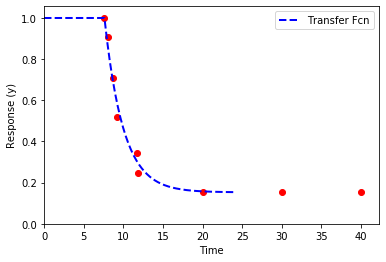

In [31]:
plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=2,label='Transfer Fcn')
plt.scatter(points['t'],points['d'], color='r')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.ylim(0)
plt.xlim(0)
plt.legend(loc='best')
plt.show()

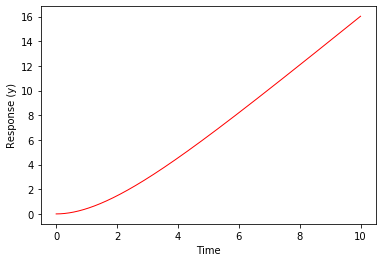

In [14]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulate taup * dy/dt = -y + K*u
a=2

##Create step function
t = np.linspace(0,10,1001)
u = np.zeros(len(t))
for i in range(len(t)): 
    if t[i] <= 5:
        u[i] = 1
    else:
        u[i] = 0

# (3) ODE Integrator
def model3(y,u):
    return (-y/a + u)
y = odeint(model3,0,t)

plt.figure(1)
plt.plot(t,y,'r-',linewidth=1)
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.show()

In [27]:
points

,t,d
0,7.62,1.000
1,8.08,0.906
2,8.69,0.706
3,9.22,0.520
4,11.73,0.346
5,11.85,0.247
6,20.00,0.153
7,30.00,0.153
8,40.00,0.153
